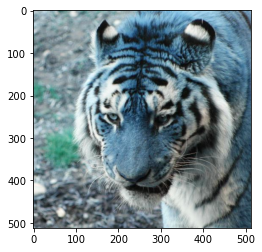

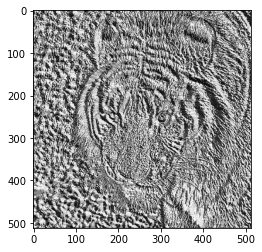

LBP Program is finished


In [3]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

def get_pixel(img, center, x, y): 

    new_value = 0

    try: 
        # If local neighbourhood pixel 
        # value is greater than or equal 
        # to center pixel values then 
        # set it to 1 
        if img[x][y] >= center: 
            new_value = 1

    except: 
        # Exception is required when 
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass

    return new_value 

# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y): 

	center = img[x][y] 

	val_ar = [] 
	
	# top_left 
	val_ar.append(get_pixel(img, center, x-1, y-1)) 
	
	# top 
	val_ar.append(get_pixel(img, center, x-1, y)) 
	
	# top_right 
	val_ar.append(get_pixel(img, center, x-1, y + 1)) 
	
	# right 
	val_ar.append(get_pixel(img, center, x, y + 1)) 
	
	# bottom_right 
	val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
	
	# bottom 
	val_ar.append(get_pixel(img, center, x + 1, y)) 
	
	# bottom_left 
	val_ar.append(get_pixel(img, center, x + 1, y-1)) 
	
	# left 
	val_ar.append(get_pixel(img, center, x, y-1)) 
	
	# Now, we need to convert binary 
	# values to decimal 
	power_val = [1, 2, 4, 8, 16, 32, 64, 128] 

	val = 0
	
	for i in range(len(val_ar)): 
		val += val_ar[i] * power_val[i] 
		
	return val 

path = r"C:\Users\inder\Desktop\Image Matching\1000\0.jpg"
img_bgr = cv2.imread(path, 1) 

height, width, _ = img_bgr.shape 

# We need to convert RGB image 
# into gray one because gray 
# image has one channel only. 
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) 

# Create a numpy array as 
# the same height and width 
# of RGB image 
img_lbp = np.zeros((height, width), np.uint8) 

for i in range(0, height): 
    for j in range(0, width): 
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 

plt.imshow(img_bgr) 
plt.show() 

plt.imshow(img_lbp, cmap ="gray") 
plt.show() 

print("LBP Program is finished") 


In [4]:
import os



# Function to process an image and save its LBP version
def process_image_and_save(input_path, output_path):
    # Read the image
    img_bgr = cv2.imread(input_path, 1)
    
    # Convert to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    # Calculate dimensions
    height, width = img_gray.shape
    
    # Create an array for LBP
    img_lbp = np.zeros((height, width), np.uint8)
    
    # Calculate LBP for each pixel
    for i in range(height):
        for j in range(width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    
    # Save the LBP image
    cv2.imwrite(output_path, img_lbp)

# Input and output folders
input_folder = r"C:\Users\inder\Desktop\Image Matching\1000"
output_folder = r"C:\Users\inder\Desktop\Image Matching\Local Binary Pattern"

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        process_image_and_save(input_path, output_path)

print("LBP processing is finished")


LBP processing is finished
